In [1]:
import pandas as pd
import numpy as np
import seaborn as sns     
import matplotlib.pyplot as plt
%matplotlib inline        

In [2]:
religiousMotifs = pd.read_csv("WDB_ReligiousMotif.csv")
meetingPlaces = pd.read_csv("WDB_WitchesMeetingPlace.csv")
demonicPacts = pd.read_csv("WDB_DemonicPact.csv")

accuseds = pd.read_csv("WDB_Accused.csv")
ritualObjects = pd.read_csv("WDB_RitualObject.csv")
cases = pd.read_csv("WDB_Case.csv")

In [3]:
religiousMotifs.drop(['MotifSystemId', 'Createdby',
'MotifID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon'], axis=1, inplace = True)

In [4]:
demonicPacts.drop(['DemonicSystemId', 'Createdby',
'DemonicID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon'], axis=1, inplace = True)

In [5]:
meetingPlaces.drop(['MeetingPlaceSystemId', 'Createdby',
'MeetingPlaceID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon'], axis = 1,inplace = True)

In [6]:
accuseds.drop(['AccusedSystemId', 'Createdby',
'AccusedID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon','Patronymic',
'DesTitle','Age_estcareer',
'Age_estchild','Notes',
'Res_NGR_Northing','Res_NGR_Easting',
'Res_NGR_Letters'], axis=1, inplace = True)

In [7]:
cases = cases[['CaseRef','AccusedRef','CaseStart_date']]

In [8]:
#替换nan -》unknown
accuseds.fillna(value= {'Age': 'Unknown', 'Sex': 'Unknown', 'Res_settlement': 'Unknown','MaritalStatus' :'Unknown'}, inplace=True)

In [9]:
accuseds

,AccusedRef,FirstName,LastName,M_Firstname,M_Surname,Alias,Sex,Age,Res_settlement,Res_parish,Res_presbytery,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation
0,A/EGD/10,Mareon,Quheitt,Marion,White,NaN,Female,Unknown,Sammuelston,P/JO/3539,Haddington,Haddington,NaN,NaN,Unknown,NaN,NaN
1,A/EGD/100,Thom,Cockburn,Thomas,Cockburn,NaN,Male,Unknown,Unknown,NaN,NaN,Haddington,NaN,NaN,Unknown,NaN,NaN
2,A/EGD/1000,Christian,Aitkenhead,Christine,Aikenhead,NaN,Female,Unknown,Rottinraw,NaN,NaN,Dumfries,NaN,NaN,Married,NaN,NaN
3,A/EGD/1001,Janet,Ireland,Janet,Ireland,NaN,Female,Unknown,Rottinraw,NaN,NaN,Dumfries,NaN,NaN,Widowed,NaN,NaN
4,A/EGD/1002,Agnes,Hendersoun,Agnes,Henderson,NaN,Female,Unknown,Unknown,P/ST/1446,Stirling,Stirling,NaN,NaN,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,A/LA/3240,Cristeane,Johnnestoun,Christine,Johnson,NaN,Female,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3215,A/LA/3241,Jonet,Curchan,Janet,Curchan,NaN,Female,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3216,A/LA/3242,James,Chalmer,James,Chalmers,NaN,Male,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3217,A/LA/3243,Catherine,Campbell,Katherine,Campbell,NaN,Female,Unknown,Fowlis,P/ST/1168,Forfar,Forfar,NaN,NaN,Unknown,NaN,NaN


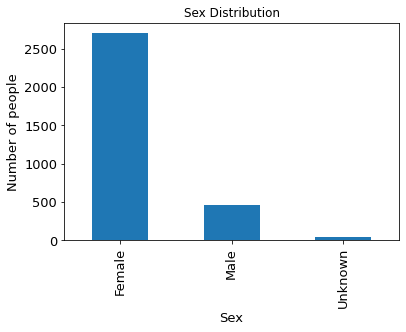

In [10]:
#单纯统计性别，不管年龄是不是unknown
sex_1 = accuseds['Sex'].value_counts().plot.bar()
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('Sex',size = 13)
plt.ylabel('Number of people',size = 13)
plt.rcParams['figure.figsize'] = (8.0, 6.0)
sex_1.set_title('Sex Distribution')
plt.show()

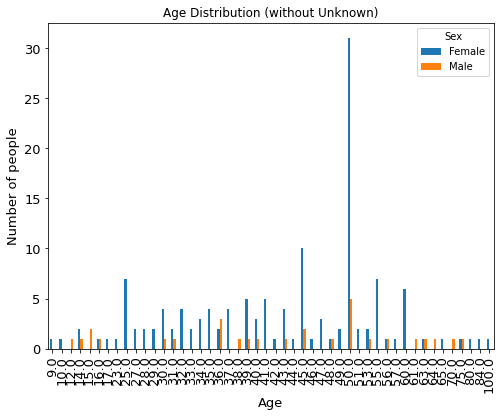

In [11]:
#没有unknown的sex和age分布统计
sex_age_without_unknown = accuseds.loc[(accuseds['Sex'] != 'Unknown') & (accuseds['Age'] != 'Unknown')]
sex_age_without=pd.crosstab(sex_age_without_unknown['Age'],sex_age_without_unknown['Sex'])
sex_age_without_graph = sex_age_without.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('Age',size = 13)
plt.ylabel('Number of people',size = 13)
plt.rcParams['figure.figsize'] = (30.0, 10.0)
sex_age_without_graph.set_title('Age Distribution (without Unknown)')
plt.show()
#sex_age=pd.crosstab(accuseds['Age'],accuseds['Sex'])
#sex_age.plot(kind='bar')

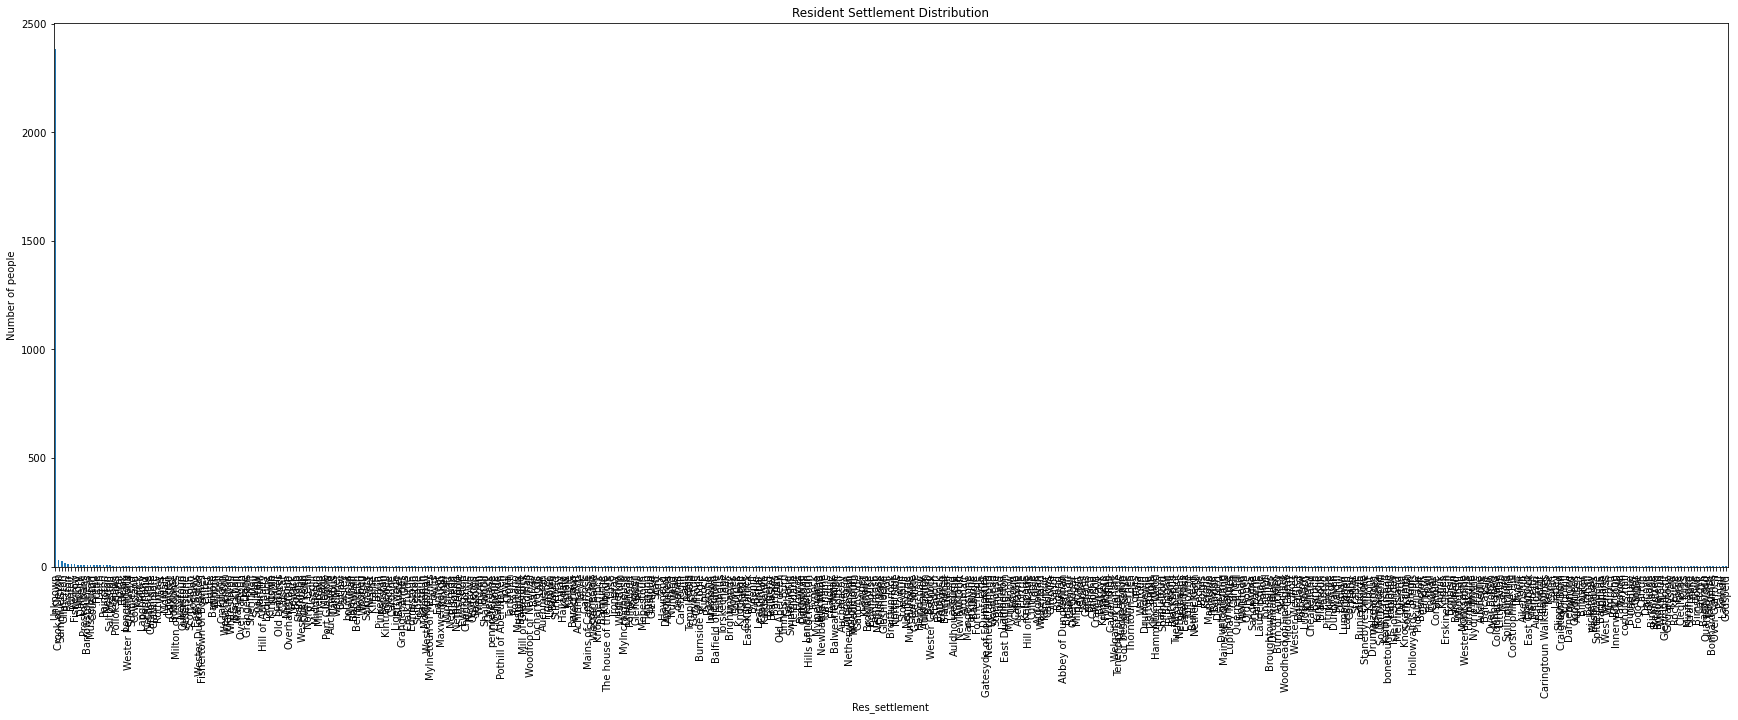

In [12]:
#单纯统计Res_settlement
settlement_graph = accuseds['Res_settlement'].value_counts().plot.bar()
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('Res_settlement',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (200.0, 5.0)
settlement_graph.set_title('Resident Settlement Distribution')
plt.show()

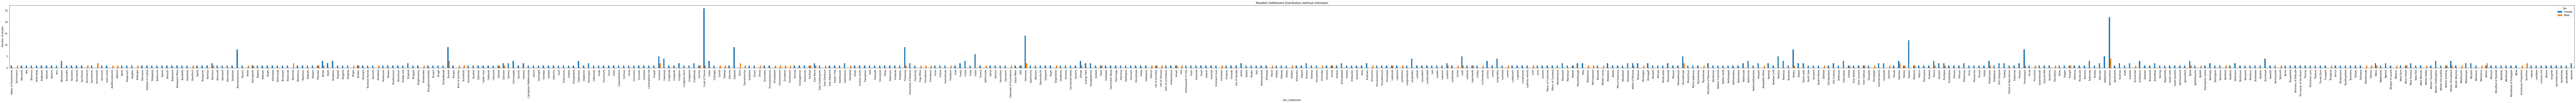

In [13]:
#Res_settlement without unknown & sex without unknown
Res_settlement_without_unknown = accuseds.loc[(accuseds['Res_settlement'] != 'Unknown') & (accuseds['Sex']!='Unknown')]
Res_settlement_without_unknown_graph=pd.crosstab(Res_settlement_without_unknown['Res_settlement'],Res_settlement_without_unknown['Sex'])
abc = Res_settlement_without_unknown_graph.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('Res_settlement',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (200.0, 5.0)
abc.set_title('Resident Settlement Distribution (without Unknown)')
plt.show()

In [14]:
accuseds['MaritalStatus'].value_counts()

Unknown            2485
Married             575
Widowed             140
Single               16
Irregular union       2
/                     1
Name: MaritalStatus, dtype: int64

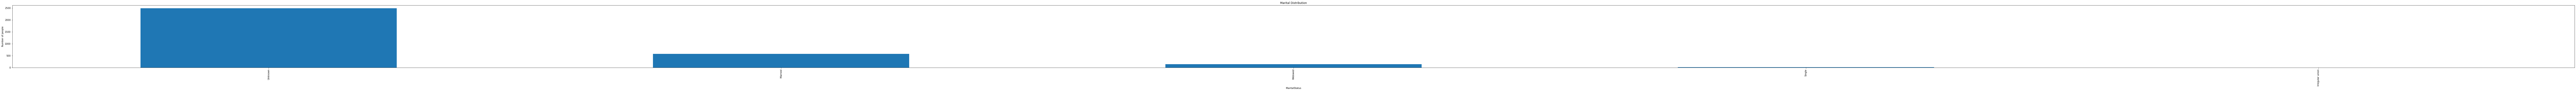

In [15]:
#Status MaritalStatus
marry = accuseds[(accuseds['MaritalStatus']!='/')]
marry_graph = marry['MaritalStatus'].value_counts().plot.bar()
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('MaritalStatus',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (8.0, 5.0)
marry_graph.set_title('Marital Distribution')
plt.show()

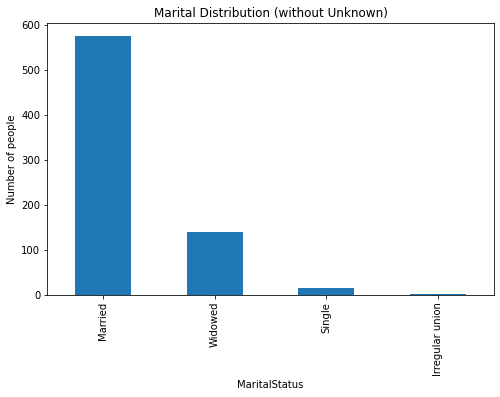

In [16]:
#Status MaritalStatus
marry = accuseds[(accuseds['MaritalStatus']!='/')&(accuseds['MaritalStatus']!='Unknown')]
marry_graph = marry['MaritalStatus'].value_counts().plot.bar()
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('MaritalStatus',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (8.0, 5.0)
marry_graph.set_title('Marital Distribution (without Unknown)')
plt.show()

In [17]:
ritualObjects_accuseds = ritualObjects[['RitualObjectRef','RitualObjectID','CaseRef','RitualObject_Type']]

In [18]:
#combine ritualObjects_accuseds (only have ritualObjects now) and Cases
ritualObjects_accuseds = ritualObjects_accuseds.merge(cases,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))

In [19]:
#combine ritualObjects_accuseds (have ritualObjects & Case) and Accuseds
ritualObjects_accuseds = ritualObjects_accuseds.merge(accuseds,left_on="AccusedRef",right_on="AccusedRef",suffixes = (False, False))

In [20]:
ritualObjects_accuseds.describe(include = ["object"])

,RitualObjectRef,CaseRef,RitualObject_Type,AccusedRef,CaseStart_date,FirstName,LastName,M_Firstname,M_Surname,Alias,...,Age,Res_settlement,Res_parish,Res_presbytery,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation
count,632,632,632,632,601,632,632,620,621,76,...,632,632,371,452,620,42,11,632,168,83
unique,632,222,128,222,147,84,200,44,177,27,...,38,75,85,44,27,11,4,5,6,11
top,RO/LA/135,C/EGD/63,Water,A/EGD/52,19/3/1697,Margaret,Stewart,Janet,Stewart,Scudder,...,Unknown,Unknown,P/ST/826,Aberdeen,Renfrew,Stirling,English,Unknown,Middling,Vagabond
freq,1,13,60,13,54,56,18,72,21,9,...,454,388,24,54,108,9,4,374,90,26


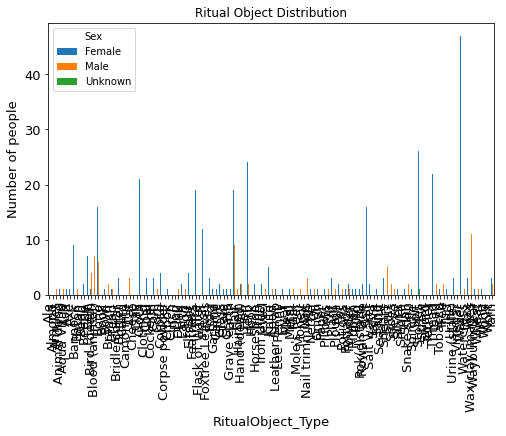

In [21]:
#ritual object and sex(include unknown)
ritualObjects_accuseds_graph=pd.crosstab(ritualObjects_accuseds['RitualObject_Type'],ritualObjects_accuseds['Sex'])
ro1 = ritualObjects_accuseds_graph.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('RitualObject_Type',size = 13)
plt.ylabel('Number of people',size = 13)
plt.rcParams['figure.figsize'] = (100.0, 10.0)
ro1.set_title('Ritual Object Distribution')
plt.show()

In [22]:
#combine ritualObjects_accuseds (have ritualObjects & Case & accused) and MeetingPlace
ritualObjects_M = ritualObjects_accuseds.merge(meetingPlaces,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))

In [23]:
ritualObjects_M_1 = ritualObjects_M.drop_duplicates(subset=['CaseRef', 'MeetingPlaceRef'], keep='first')
ritualObjects_M_1

,RitualObjectRef,RitualObjectID,CaseRef,RitualObject_Type,AccusedRef,CaseStart_date,FirstName,LastName,M_Firstname,M_Surname,...,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation,MeetingPlaceRef,MeetingPlace_Place,Inversion,Location
0,RO/JO/323,323,C/EGD/63,Elfshot,A/EGD/52,22/10/1590,Agnes,Sampsoune,Agnes,Samson,...,Edinburgh,NaN,NaN,Widowed,NaN,NaN,MP/LA/300,Kirk,True,North Berwick Kirk
1,RO/JO/323,323,C/EGD/63,Elfshot,A/EGD/52,22/10/1590,Agnes,Sampsoune,Agnes,Samson,...,Edinburgh,NaN,NaN,Widowed,NaN,NaN,MP/LA/301,Ship,False,off the coast of the pannes
2,RO/JO/323,323,C/EGD/63,Elfshot,A/EGD/52,22/10/1590,Agnes,Sampsoune,Agnes,Samson,...,Edinburgh,NaN,NaN,Widowed,NaN,NaN,MP/LA/306,Ship,False,the grace of God
3,RO/JO/323,323,C/EGD/63,Elfshot,A/EGD/52,22/10/1590,Agnes,Sampsoune,Agnes,Samson,...,Edinburgh,NaN,NaN,Widowed,NaN,NaN,MP/LA/307,Shore,True,all along the south coast of the forth
4,RO/JO/323,323,C/EGD/63,Elfshot,A/EGD/52,22/10/1590,Agnes,Sampsoune,Agnes,Samson,...,Edinburgh,NaN,NaN,Widowed,NaN,NaN,MP/LA/308,Kirk,False,"Kirk of Garvett, be-eist Burn syde"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,RO/LA/84,84,C/EGD/34,Herb,A/EGD/23,28/5/1559,Alesoun,Pierson,Alison,Pierson,...,Fife,NaN,NaN,Unknown,NaN,NaN,MP/LA/292,Moor,False,Grange-more
1071,RO/LA/88,88,C/EGD/140,Hairbelt,A/EGD/129,28/7/1603,Patrik,Lowrie,Patrick,Lawrie,...,Ayr,NaN,NaN,Unknown,NaN,NaN,MP/LA/254,Shore,False,Common Waist Sandhillis near Irving
1072,RO/LA/88,88,C/EGD/140,Hairbelt,A/EGD/129,28/7/1603,Patrik,Lowrie,Patrick,Lawrie,...,Ayr,NaN,NaN,Unknown,NaN,NaN,MP/LA/265,Kirkyard,False,NaN
1073,RO/LA/88,88,C/EGD/140,Hairbelt,A/EGD/129,28/7/1603,Patrik,Lowrie,Patrick,Lawrie,...,Ayr,NaN,NaN,Unknown,NaN,NaN,MP/LA/266,Kirk,False,NaN


In [31]:
ritualObjects_M_1['Ethnic_origin'].value_counts()

Gael       5
Irish      2
English    1
Name: Ethnic_origin, dtype: int64

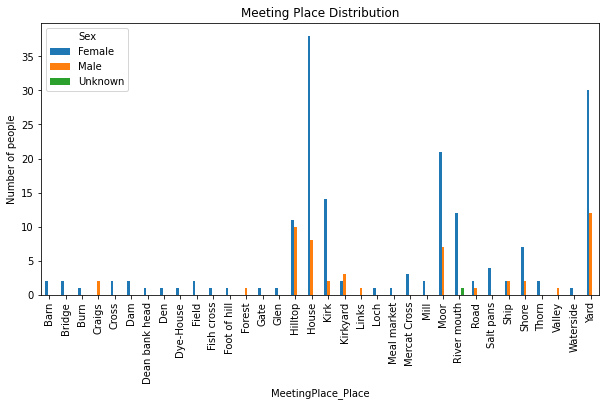

In [29]:
#Res_settlement without unknown & sex without unknown
meeting_1 = ritualObjects_M_1[['MeetingPlace_Place','Sex']]
#meeting_sex = ritualObjects_M_1.loc[(ritualObjects_M_1['MeetingPlace_Place'] != 'Unknown') & (accuseds['Sex']!='Unknown')]
meeting_g=pd.crosstab(meeting_1['MeetingPlace_Place'],meeting_1['Sex'])
efg = meeting_g.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('MeetingPlace_Place',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
efg.set_title('Meeting Place Distribution')
plt.show()

In [30]:
#combine ritualObjects_accuseds (have ritualObjects & Case & accused) and religiousMotifs
ritualObjects_R = ritualObjects_accuseds.merge(religiousMotifs,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))

In [32]:
ritualObjects_R

,RitualObjectRef,RitualObjectID,CaseRef,RitualObject_Type,AccusedRef,CaseStart_date,FirstName,LastName,M_Firstname,M_Surname,...,Res_parish,Res_presbytery,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation,MotifRef,Motif_Type
0,RO/JO/316,316,C/EGD/2453,Water,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/41,Eschatology
1,RO/JO/316,316,C/EGD/2453,Water,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/42,Trinity
2,RO/JO/677,677,C/EGD/2453,Belt,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/41,Eschatology
3,RO/JO/677,677,C/EGD/2453,Belt,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/42,Trinity
4,RO/JO/678,678,C/EGD/2453,Wheat,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/41,Eschatology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,RO/LA/633,633,C/EGD/1558,Liver,A/EGD/1544,13/4/1662,Issobell,Gowdie,Isobel,Goudie,...,P/ST/490,Nairn,Nairn,NaN,NaN,Married,NaN,NaN,RM/LA/102,Trinity
512,RO/LA/633,633,C/EGD/1558,Liver,A/EGD/1544,13/4/1662,Issobell,Gowdie,Isobel,Goudie,...,P/ST/490,Nairn,Nairn,NaN,NaN,Married,NaN,NaN,RM/LA/103,Saints
513,RO/LA/634,634,C/EGD/1558,Cloth,A/EGD/1544,13/4/1662,Issobell,Gowdie,Isobel,Goudie,...,P/ST/490,Nairn,Nairn,NaN,NaN,Married,NaN,NaN,RM/JO/106,Three
514,RO/LA/634,634,C/EGD/1558,Cloth,A/EGD/1544,13/4/1662,Issobell,Gowdie,Isobel,Goudie,...,P/ST/490,Nairn,Nairn,NaN,NaN,Married,NaN,NaN,RM/LA/102,Trinity


In [34]:
ritualObjects_R_1 = ritualObjects_R.drop_duplicates(subset=['CaseRef', 'MotifRef'], keep='first')
ritualObjects_R_1

,RitualObjectRef,RitualObjectID,CaseRef,RitualObject_Type,AccusedRef,CaseStart_date,FirstName,LastName,M_Firstname,M_Surname,...,Res_parish,Res_presbytery,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation,MotifRef,Motif_Type
0,RO/JO/316,316,C/EGD/2453,Water,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/41,Eschatology
1,RO/JO/316,316,C/EGD/2453,Water,A/EGD/2377,29/1/1706,Jean,Brown,Jean,Brown,...,P/ST/1336,Wigtown,Wigtown,NaN,NaN,Unknown,Lower,Servant,RM/JO/42,Trinity
8,RO/JO/317,317,C/EGD/142,Elfshot,A/EGD/131,3/9/1607,Bartie,Patersoune,Bartie,Paterson,...,P/ST/1274,Dalkeith,Edinburgh,NaN,NaN,Unknown,Lower,Tasker,RM/LA/17,Three
9,RO/JO/317,317,C/EGD/142,Elfshot,A/EGD/131,3/9/1607,Bartie,Patersoune,Bartie,Paterson,...,P/ST/1274,Dalkeith,Edinburgh,NaN,NaN,Unknown,Lower,Tasker,RM/LA/18,Prayer
10,RO/JO/317,317,C/EGD/142,Elfshot,A/EGD/131,3/9/1607,Bartie,Patersoune,Bartie,Paterson,...,P/ST/1274,Dalkeith,Edinburgh,NaN,NaN,Unknown,Lower,Tasker,RM/LA/19,Nine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,RO/LA/600,600,C/EGD/28,Shirt,A/EGD/17,29/12/1570,Janet,Boyman,Janet,Boyman,...,NaN,NaN,Ayr,NaN,NaN,Married,NaN,NaN,RM/LA/97,Prayer
473,RO/LA/600,600,C/EGD/28,Shirt,A/EGD/17,29/12/1570,Janet,Boyman,Janet,Boyman,...,NaN,NaN,Ayr,NaN,NaN,Married,NaN,NaN,RM/LA/98,Holy well
480,RO/LA/621,621,C/EGD/1558,Corpse,A/EGD/1544,13/4/1662,Issobell,Gowdie,Isobel,Goudie,...,P/ST/490,Nairn,Nairn,NaN,NaN,Married,NaN,NaN,RM/JO/106,Three
481,RO/LA/621,621,C/EGD/1558,Corpse,A/EGD/1544,13/4/1662,Issobell,Gowdie,Isobel,Goudie,...,P/ST/490,Nairn,Nairn,NaN,NaN,Married,NaN,NaN,RM/LA/102,Trinity


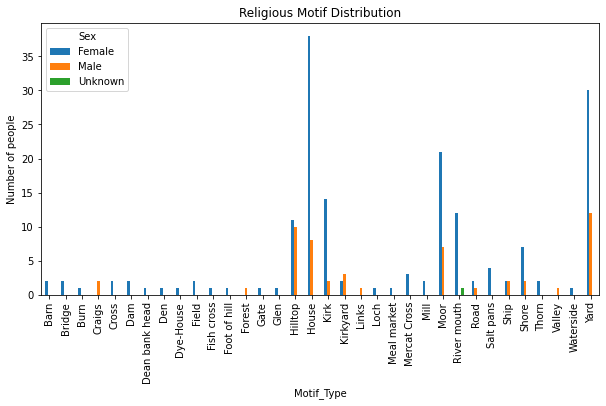

In [35]:
#Res_settlement without unknown & sex without unknown
motif_1 = ritualObjects_R_1[['Motif_Type','Sex']]
#meeting_sex = ritualObjects_M_1.loc[(ritualObjects_M_1['MeetingPlace_Place'] != 'Unknown') & (accuseds['Sex']!='Unknown')]
motif_1=pd.crosstab(motif_1['Motif_Type'],motif_1['Sex'])
hij = meeting_g.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('Motif_Type',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
hij.set_title('Religious Motif Distribution')
plt.show()

In [36]:
#combine ritualObjects_accuseds (have ritualObjects & Case & accused) and demonicPacts
ritualObjects_D = ritualObjects_accuseds.merge(demonicPacts,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))